<a href="https://colab.research.google.com/github/TheAditya-10/Student-Lifestyle/blob/main/Student_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To study the reltion between student's lifestyle and Academics and Stress Level.**

A Combine Problem of Regression and Classification; As the End task is to predict Student's CGPA and Stress Level Both.

**Assumptions**
- Stress Level is Categorised into High, Moderate and Low.
- The Data has 2,000 Records which is not a quite big amount of data for model but we will try.

# Getting The Data

In [ ]:
import pandas as pd

file_path = '/content/student_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

# Print some info to check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [ ]:
df['Stress_Level'].value_counts()

,count
Stress_Level,
High,1029
Moderate,674
Low,297


In [ ]:
#Creating Test Set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['Stress_Level']):
   train_set = df.loc[train_index]
   test_set = df.loc[test_index]


#Discovering & Visualising the Data


In [ ]:
df = train_set.copy()
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
274,275,9.3,0.7,8.5,4.6,0.9,3.43,High
98,99,9.8,3.4,9.2,0.7,0.9,3.15,High
1280,1281,8.5,3.3,9.3,1.2,1.7,3.25,High
1453,1454,5.8,2.8,7.6,3.9,3.9,3.09,Low
709,710,9.7,3.5,8.7,0.6,1.5,3.36,High


In [ ]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,994.080625,7.487750,1.991687,7.506750,2.695375,4.318437,3.119794
std,575.395851,1.423852,1.163742,1.453904,1.692197,2.527176,0.300187
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.000000,2.240000
25%,498.500000,6.300000,1.000000,6.200000,1.200000,2.300000,2.900000
50%,990.000000,7.400000,2.000000,7.550000,2.600000,4.100000,3.110000
75%,1486.500000,8.700000,3.000000,8.800000,4.100000,6.200000,3.332500
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.000000,4.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

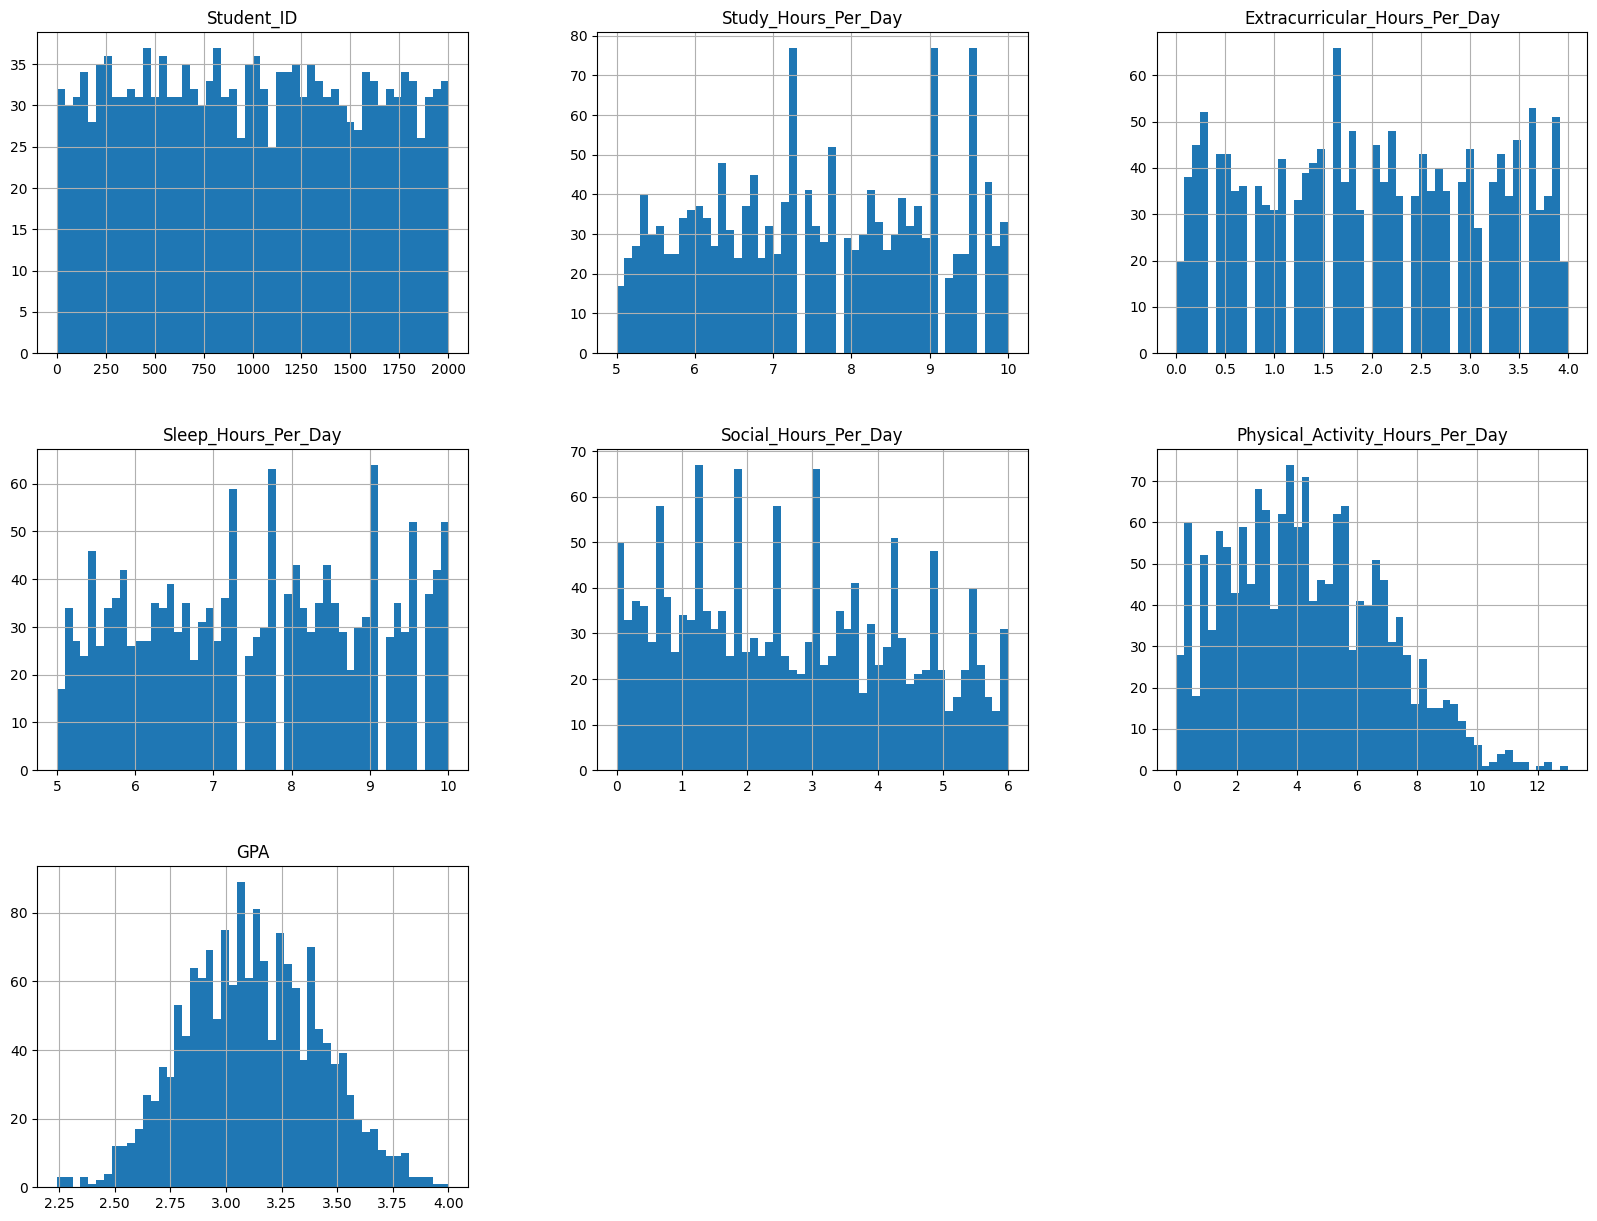

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

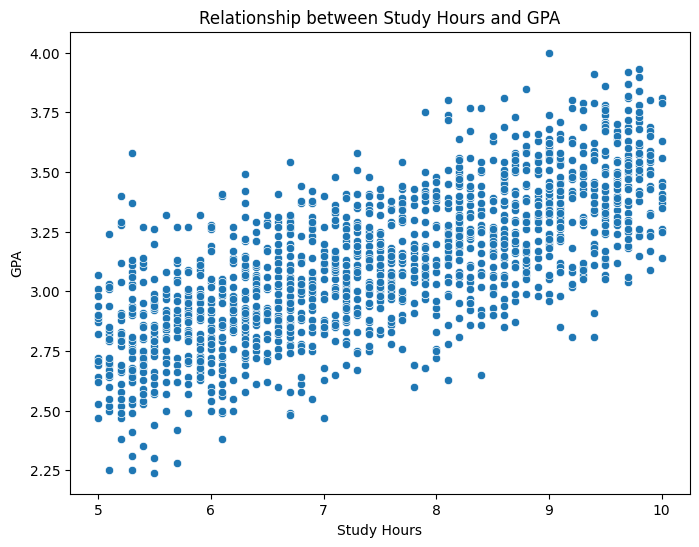

In [ ]:
# To visualize the relationship between two numerical columns (e.g., 'Study Hours' and 'GPA'):
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=df)
plt.title('Relationship between Study Hours and GPA')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.show()

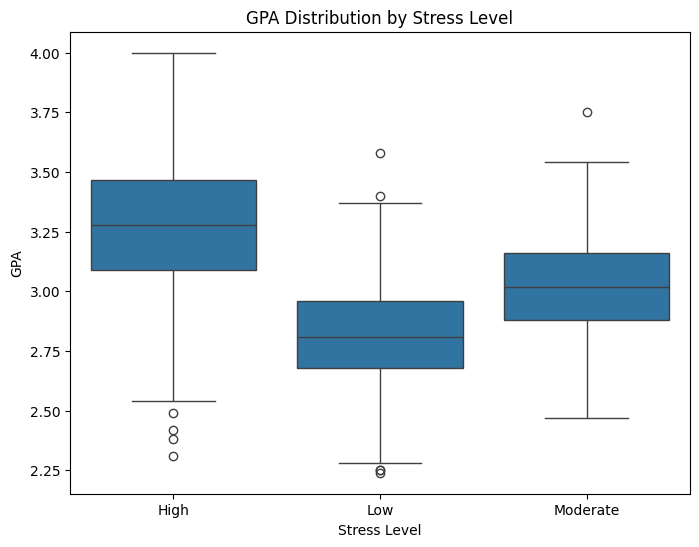

In [ ]:
# To compare the distribution of a numerical column ('GPA') across different categories ('Stress Level'):
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='GPA', data=df)
plt.title('GPA Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('GPA')
plt.show()

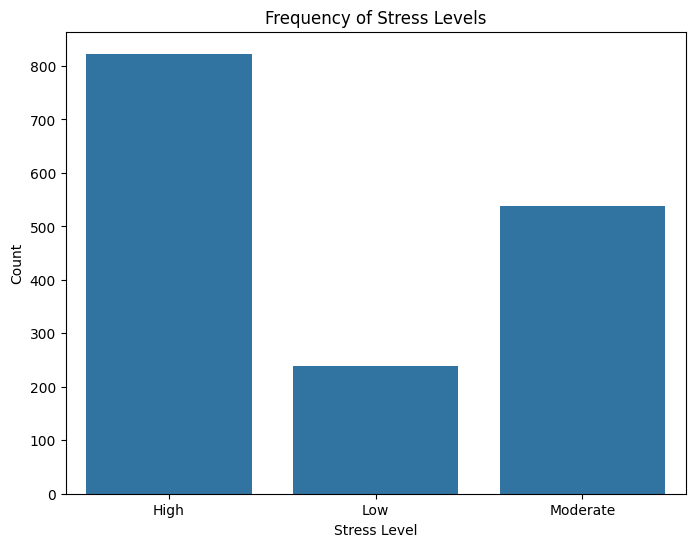

In [ ]:
# To visualize the frequency of different categories in a categorical column (e.g., 'Stress Level'):
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df)
plt.title('Frequency of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

In [ ]:
new_df = df.copy()
new_df.drop(columns=['Stress_Level'], inplace=True)
corr_matrix = new_df.corr()
corr_matrix['GPA'].sort_values(ascending=False)

,GPA
GPA,1.000000
Study_Hours_Per_Day,0.725839
Student_ID,0.008095
Sleep_Hours_Per_Day,0.006384
Extracurricular_Hours_Per_Day,-0.025335
Social_Hours_Per_Day,-0.079534
Physical_Activity_Hours_Per_Day,-0.347700


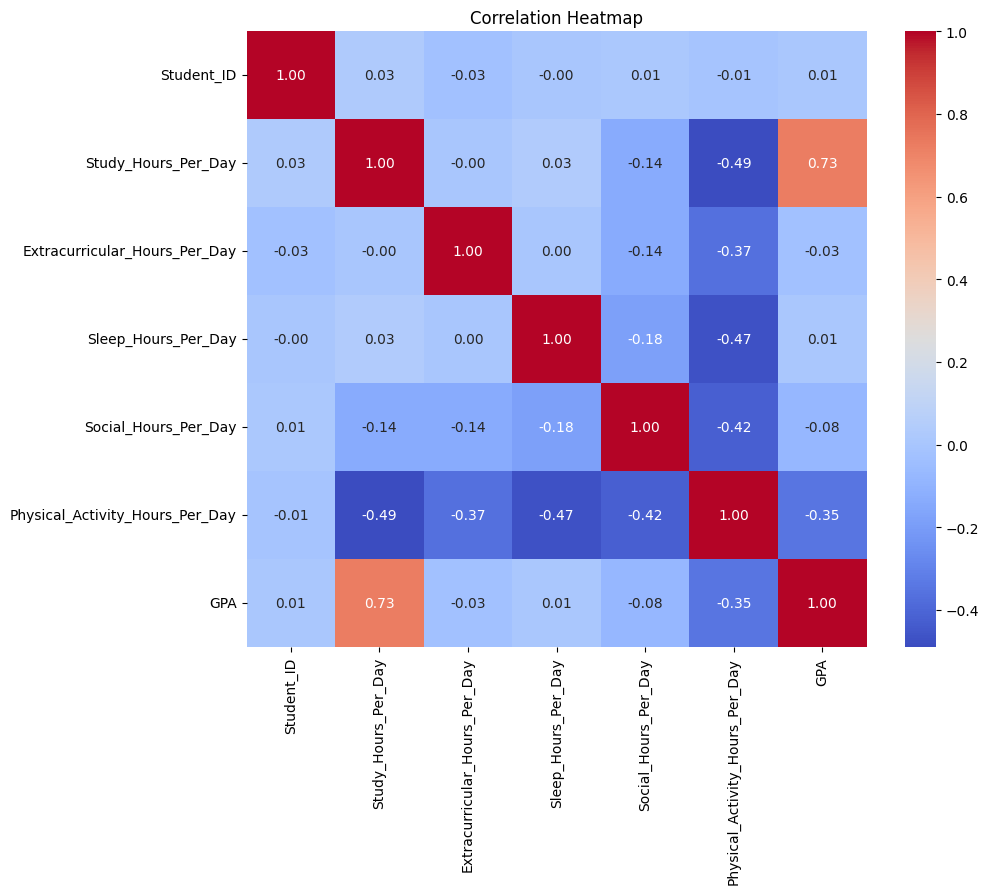

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Observations
- All the Data is in Hours means no need of Feature Scaling.
- GPA is Bell Cureved means good for model.
- GPA and Study Hours are Strongly Correlated.
- Stress Level is Directly Correlated with GPA. Greater the Stress , Greater the GPA.
- Student ID is non-valuable columns it acts as index.
- Physical_Activity_Hours_Per_Day is also inversely correlated.

#DATA Preparation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
num_cols = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']
cat_cols = ['Stress_Level']

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

In [ ]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('col', OrdinalEncoder(categories=[['Low', 'Moderate', 'High']]), cat_cols),

])

In [ ]:
train_set_prepared = pd.DataFrame(full_pipeline.fit_transform(train_set))

In [ ]:
train_set.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
274,275,9.3,0.7,8.5,4.6,0.9,3.43,High
98,99,9.8,3.4,9.2,0.7,0.9,3.15,High
1280,1281,8.5,3.3,9.3,1.2,1.7,3.25,High
1453,1454,5.8,2.8,7.6,3.9,3.9,3.09,Low
709,710,9.7,3.5,8.7,0.6,1.5,3.36,High


In [ ]:
train_set_prepared.head()

,0,1,2,3,4,5
0,9.3,0.7,8.5,0.9,4.6,2.0
1,9.8,3.4,9.2,0.9,0.7,2.0
2,8.5,3.3,9.3,1.7,1.2,2.0
3,5.8,2.8,7.6,3.9,3.9,0.0
4,9.7,3.5,8.7,1.5,0.6,2.0


#Select and Train a Model

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for linear regression (predict GPA)
train_set_prepared_lr = train_set_prepared.copy()

# Assuming 'GPA' is in the last column of train_set_prepared
train_set_labels_lr = train_set['GPA'].copy()


# Train a linear regression model
lin_reg = LinearRegression()

# Use cross-validation with RMSE
scores = cross_val_score(lin_reg, train_set_prepared_lr, train_set_labels_lr,
                         scoring="neg_mean_squared_error", cv=10) # 10-fold cross-validation

rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Scores: [0.21414964 0.19015094 0.21231787 0.20450981 0.18656144 0.22296929
 0.22352986 0.21390845 0.17769838 0.21892718]
Mean: 0.20647228463689116
Standard deviation: 0.015366400195493408


In [ ]:

from sklearn.tree import DecisionTreeRegressor

# Prepare the data for decision tree regression (predict GPA)
train_set_prepared_dtr = train_set_prepared.copy()
train_set_labels_dtr = train_set['GPA'].copy()

# Train a decision tree regression model
tree_reg = DecisionTreeRegressor()

# Use cross-validation with RMSE
scores = cross_val_score(tree_reg, train_set_prepared_dtr, train_set_labels_dtr,
                         scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

print("Decision Tree Regressor Scores:", rmse_scores)
print("Decision Tree Regressor Mean:", rmse_scores.mean())
print("Decision Tree Regressor Standard deviation:", rmse_scores.std())

Decision Tree Regressor Scores: [0.34062443 0.30742275 0.32617193 0.31240799 0.3055313  0.30687436
 0.30420491 0.31113502 0.28567136 0.31986228]
Decision Tree Regressor Mean: 0.3119906314820217
Decision Tree Regressor Standard deviation: 0.013877891318544139


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data for random forest regression (predict GPA)
train_set_prepared_rfr = train_set_prepared.copy()
train_set_labels_rfr = train_set['GPA'].copy()

# Train a random forest regression model
forest_reg = RandomForestRegressor()

# Use cross-validation with RMSE
scores = cross_val_score(forest_reg, train_set_prepared_rfr, train_set_labels_rfr,
                         scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

print("Random Forest Regressor Scores:", rmse_scores)
print("Random Forest Regressor Mean:", rmse_scores.mean())
print("Random Forest Regressor Standard deviation:", rmse_scores.std())

Random Forest Regressor Scores: [0.22867189 0.20803202 0.22652301 0.22222229 0.21533549 0.23958682
 0.23073329 0.22837116 0.1928629  0.23877069]
Random Forest Regressor Mean: 0.2231109562548796
Random Forest Regressor Standard deviation: 0.013596265536286147


In [ ]:

from sklearn.svm import SVR # Import SVR

# Prepare the data for Support Vector Regression (predict GPA)
train_set_prepared_svr = train_set_prepared.copy()
train_set_labels_svr = train_set['GPA'].copy()

# Train an SVR model
svm_reg = SVR() # Initialize SVR

# Use cross-validation with RMSE
scores = cross_val_score(svm_reg, train_set_prepared_svr, train_set_labels_svr,
                         scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

print("Support Vector Regressor Scores:", rmse_scores)
print("Support Vector Regressor Mean:", rmse_scores.mean())
print("Support Vector Regressor Standard deviation:", rmse_scores.std())

Support Vector Regressor Scores: [0.21317809 0.18965851 0.21513377 0.20416132 0.19279952 0.22344118
 0.21999474 0.21783201 0.18086171 0.22525487]
Support Vector Regressor Mean: 0.20823157251738583
Support Vector Regressor Standard deviation: 0.014739595562726282


Linear Regression Does Pretty Well

#Fine Tune the Model

In [ ]:
# prompt: predict  on test set

import numpy as np
from sklearn.preprocessing import OrdinalEncoder

test_set_prepared = pd.DataFrame(full_pipeline.transform(test_set))

final_model = lin_reg

# Fit the final model on the entire training data
final_model.fit(train_set_prepared, train_set['GPA'])

gpa_predictions = final_model.predict(test_set_prepared)


# Evaluate the model (example using RMSE)
final_mse = mean_squared_error(test_set['GPA'], gpa_predictions)
final_rmse = np.sqrt(final_mse)
print(f"Final RMSE on test set: {final_rmse}")

# You can also print or analyze the predictions
#print("Predictions:", gpa_predictions)

# To predict Stress level you would need to train and evaluate a classification model
# (e.g., Logistic Regression, Random Forest Classifier, etc.) on the same prepared data,
# but with the 'Stress_Level' column as the target variable.

Final RMSE on test set: 0.18652826681923831
